In [1]:
import pandas
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 

In [2]:
data = pandas.read_excel("C:\\Users\\nagas\\OneDrive\\Desktop\\Data_Best Restaurants.xlsx")
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [4]:
#columns in our data
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [5]:
# check if data has any null values
data.isnull()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
null_columns=data.columns[data.isnull().any()]

In [8]:
data[data.isnull().any(axis=1)][null_columns].head()

,Restaurant Name,Cuisines
1646,NaN,"North Indian, Continental, Mexican, Italian"
9083,Corkscrew Cafe,NaN
9086,Dovetail,NaN
9094,Hillstone,NaN
9406,Jimmie's Hot Dogs,NaN


In [9]:
# we can see that Restaurant column has a null value
# It has only one null value so i am going to remove that row from the data
data.dropna(axis=0,inplace=True)
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9541 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9541 non-null   int64  
 1   Restaurant Name       9541 non-null   object 
 2   Country Code          9541 non-null   int64  
 3   City                  9541 non-null   object 
 4   Address               9541 non-null   object 
 5   Locality              9541 non-null   object 
 6   Locality Verbose      9541 non-null   object 
 7   Longitude             9541 non-null   float64
 8   Latitude              9541 non-null   float64
 9   Cuisines              9541 non-null   object 
 10  Average Cost for two  9541 non-null   int64  
 11  Currency              9541 non-null   object 
 12  Has Table booking     9541 non-null   object 
 13  Has Online delivery   9541 non-null   object 
 14  Price range           9541 non-null   int64  
 15  Aggregate rating     

In [11]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [12]:
# finding duplicates on my data
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Length: 9541, dtype: bool

In [13]:
data.duplicated().sum()

0

In [14]:
# As we can see there are no duplicates in the data.. so we can go forward with EDA of data..

In [15]:
# Unique values in data Restaurant ID column

data['Restaurant ID'].unique()

array([ 7402935,  7410290,  7420899, ..., 18312106,  3900245, 18246202],
      dtype=int64)

In [16]:
# count of unique values in a column

len(pandas.unique(data['Restaurant ID']))

9541

In [17]:
# Count of Countries in our Data

len(pandas.unique(data['Country Code']))

15

In [18]:
# Explore the geographical distribution of the restaurants and 
# identify the cities with the maximum and minimum number of restaurants
 

In [19]:
# I want to add a column for Country names according to their codes.
# I have a dataset  where i know the countries according to the codes..

conditions = [
    (data['Country Code']==1),
    (data['Country Code']==14),
    (data['Country Code']==30),
    (data['Country Code']==37),
    (data['Country Code'] ==94),
    (data['Country Code']==148),
    (data['Country Code']==162),
    (data['Country Code']==166),
    (data['Country Code']==184),
    (data['Country Code']==189),
    (data['Country Code']==191),
    (data['Country Code']==208),
    (data['Country Code']==214),
    (data['Country Code']==215),
    (data['Country Code']==216)
]

values = ['India','Australia','Brazil','Canada','Indonesia','Newzeland','Phillipines','Qatar','Singapore','South Africa','Sri Lanka'
         ,'Turkey','UAE','United Kingdom','United States']

data['Countries']=np.select(conditions,values)
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Countries
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


In [20]:
data.iloc[1111]

Restaurant ID                                             18313013
Restaurant Name                               The Grand Trunk Road
Country Code                                                     1
City                                                     Hyderabad
Address                 16, Image Garden Road, Madhapur, Hyderabad
Locality                                                  Madhapur
Locality Verbose                               Madhapur, Hyderabad
Longitude                                                  78.3859
Latitude                                                    17.452
Cuisines                                     North Indian, Chinese
Average Cost for two                                          1100
Currency                                        Indian Rupees(Rs.)
Has Table booking                                               No
Has Online delivery                                            Yes
Price range                                                   

In [21]:
data['Countries'].value_counts()

India             8651
United States      425
United Kingdom      80
South Africa        60
Brazil              60
UAE                 60
Newzeland           40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Countries, dtype: int64

In [22]:
data['Restaurant Name'].value_counts()

Cafe Coffee Day                                    83
Domino's Pizza                                     79
Subway                                             63
Green Chick Chop                                   51
McDonald's                                         48
                                                   ..
Khandani Pakodewala                                 1
The Second Wife Kitchen                             1
Wangchuk's Ladakhi Kitchen                          1
Sanjha Chulah Babe Da                               1
The Living Room - The Westin Sohna Resort & Spa     1
Name: Restaurant Name, Length: 7436, dtype: int64

([<matplotlib.axis.YTick at 0x16f95a73b50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

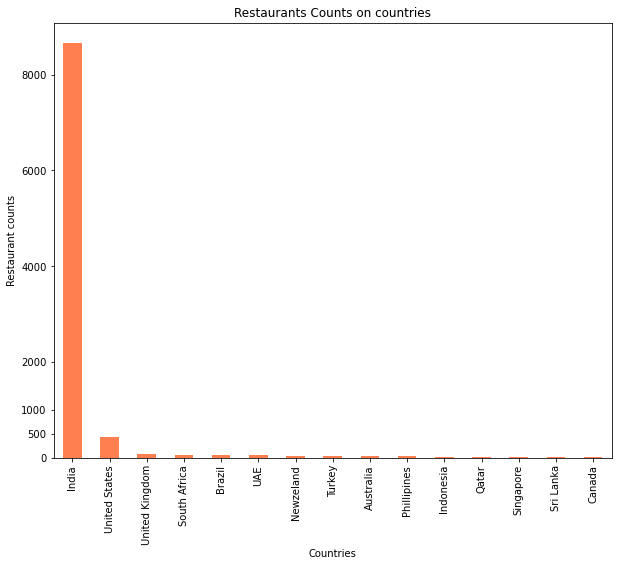

In [23]:
data['Countries'].value_counts().plot(kind='bar',figsize=(10,8),color='coral',)
plt.title("Restaurants Counts on countries")
plt.xlabel('Countries')
plt.ylabel('Restaurant counts')
plt.yticks([0,500,1000,2000,4000,6000,8000,])


In [24]:
# As we can see from above the majority of the restaurants are in India, and then United States, and United Kingdom etc....
# The least number of restuarants are in Canada..

In [25]:
# identify the cities with the maximum and minimum number of restaurants
data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Countries
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia


In [26]:
len(pandas.unique(data['City']))

140

In [27]:
data['City'].value_counts()

New Delhi        5473
Gurgaon          1118
Noida            1080
Faridabad         251
Ghaziabad          25
                 ... 
Randburg            1
Penola              1
Balingup            1
Tagaytay City       1
Palm Cove           1
Name: City, Length: 140, dtype: int64

In [28]:
# As we can see from above New Delhi has maximum number of restaurants and Many Restaurants has minimum number of restaurants..



In [29]:
#Restaurant franchising is a thriving venture. So, it is very important to explore the franchise with most national presence
# Understanding how many restaurants types are there in our data
len(pandas.unique(data['Restaurant Name']))

7436

In [30]:
# There are 7436 types of restaurants in total in our data..
data.groupby('Countries')['Restaurant Name'].count()

Countries
Australia           24
Brazil              60
Canada               4
India             8651
Indonesia           21
Newzeland           40
Phillipines         22
Qatar               20
Singapore           20
South Africa        60
Sri Lanka           20
Turkey              34
UAE                 60
United Kingdom      80
United States      425
Name: Restaurant Name, dtype: int64

In [31]:
data.groupby('Restaurant Name')['Countries'].count()

Restaurant Name
12212                   1
 Let's Burrrp           1
#45                     1
#Dilliwaala6            1
#InstaFreeze            1
                       ..
t Lounge by Dilmah      1
tashas                  1
wagamama                1
{Niche} - Cafe & Bar    1
Ìàukura€Ùa Sofras€±     1
Name: Countries, Length: 7436, dtype: int64

In [32]:
data['Restaurant Name'].value_counts()

Cafe Coffee Day                                    83
Domino's Pizza                                     79
Subway                                             63
Green Chick Chop                                   51
McDonald's                                         48
                                                   ..
Khandani Pakodewala                                 1
The Second Wife Kitchen                             1
Wangchuk's Ladakhi Kitchen                          1
Sanjha Chulah Babe Da                               1
The Living Room - The Westin Sohna Resort & Spa     1
Name: Restaurant Name, Length: 7436, dtype: int64

In [33]:
# A restaurant franchise is a brand which an investor, or franchisee, has bought the right to use. 
# The franchisee is responsible for the day-to-day running and management of the restaurant.
# In our data Many Restaurants have more branches , so we have many franchises..
# which restaurant have most antional presence

data.loc[data['Restaurant Name']=='Cafe Coffee Day','Countries'].value_counts()

India    83
Name: Countries, dtype: int64

In [34]:
data.loc[data['Restaurant Name']=="Domino's Pizza",'Countries'].value_counts()

India    79
Name: Countries, dtype: int64

In [35]:
data.loc[data['Restaurant Name']=='Subway','Countries'].value_counts()

India    63
Name: Countries, dtype: int64

In [36]:
data.loc[data['Countries']=='United States','Restaurant Name'].value_counts()

Texas Roadhouse                           4
HuHot Mongolian Grill                     3
Los Agaves                                2
Mellow Mushroom                           2
Ceviche Tapas Bar & Restaurant            2
                                         ..
Boise Fry Company                         1
The Artesian Restaurant                   1
Cool Basil                                1
The Black Cow                             1
Original Georgios Authentic Greek Food    1
Name: Restaurant Name, Length: 414, dtype: int64

In [37]:
# Restaurant Names with value counts in India.

data.loc[data['Countries']=='India','Restaurant Name'].value_counts()

Cafe Coffee Day                                    83
Domino's Pizza                                     79
Subway                                             63
Green Chick Chop                                   51
McDonald's                                         48
                                                   ..
Sufiaana                                            1
Spiritual Bar & Lounge-DoubleTree by Hilton         1
Annapurna                                           1
Hook N Cook                                         1
The Living Room - The Westin Sohna Resort & Spa     1
Name: Restaurant Name, Length: 6603, dtype: int64

In [38]:
data.loc[data['Restaurant Name']=='Cafe Coffee Day','Countries'].max()

'India'

In [39]:
# I can say that Cafe Coffee day has most national presence as there are 83 resturants in India..


In [40]:
# Find out the ratio between restaurants that allow table booking vs. those that do not allow table booking

data.head(2)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Countries
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia


In [41]:
data['Has Table booking'].unique()

array(['No', 'Yes'], dtype=object)

In [42]:
t_no = data.loc[data['Has Table booking']=='No'].count()
t_no

Restaurant ID           8383
Restaurant Name         8383
Country Code            8383
City                    8383
Address                 8383
Locality                8383
Locality Verbose        8383
Longitude               8383
Latitude                8383
Cuisines                8383
Average Cost for two    8383
Currency                8383
Has Table booking       8383
Has Online delivery     8383
Price range             8383
Aggregate rating        8383
Rating color            8383
Rating text             8383
Votes                   8383
Countries               8383
dtype: int64

In [43]:
t_yes = data.loc[data['Has Table booking']=='Yes'].count()
t_yes

Restaurant ID           1158
Restaurant Name         1158
Country Code            1158
City                    1158
Address                 1158
Locality                1158
Locality Verbose        1158
Longitude               1158
Latitude                1158
Cuisines                1158
Average Cost for two    1158
Currency                1158
Has Table booking       1158
Has Online delivery     1158
Price range             1158
Aggregate rating        1158
Rating color            1158
Rating text             1158
Votes                   1158
Countries               1158
dtype: int64

In [44]:
# As we can see there are 8383 restaurants that doesnot have a table booking option 
# and 1158 restaurants that have table booking options

print("The ratio of Restaurants that have table bookings vs restaurants thats doesnot have table bookings : ",t_yes/t_no)

The ratio of Restaurants that have table bookings vs restaurants thats doesnot have table bookings :  Restaurant ID           0.138137
Restaurant Name         0.138137
Country Code            0.138137
City                    0.138137
Address                 0.138137
Locality                0.138137
Locality Verbose        0.138137
Longitude               0.138137
Latitude                0.138137
Cuisines                0.138137
Average Cost for two    0.138137
Currency                0.138137
Has Table booking       0.138137
Has Online delivery     0.138137
Price range             0.138137
Aggregate rating        0.138137
Rating color            0.138137
Rating text             0.138137
Votes                   0.138137
Countries               0.138137
dtype: float64


In [45]:
(t_yes/t_no)

Restaurant ID           0.138137
Restaurant Name         0.138137
Country Code            0.138137
City                    0.138137
Address                 0.138137
Locality                0.138137
Locality Verbose        0.138137
Longitude               0.138137
Latitude                0.138137
Cuisines                0.138137
Average Cost for two    0.138137
Currency                0.138137
Has Table booking       0.138137
Has Online delivery     0.138137
Price range             0.138137
Aggregate rating        0.138137
Rating color            0.138137
Rating text             0.138137
Votes                   0.138137
Countries               0.138137
dtype: float64

In [46]:
# The Ratio  of Restaurants that offer table booking vs restaurants that doent offer table bookings is  0.13

In [47]:
# Find out the percentage of restaurants providing online delivery
data.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Countries
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia


In [48]:
data['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

In [49]:
R_online = data.loc[data['Has Online delivery']=='Yes','Restaurant ID'].count()
R_online

2451

In [50]:
R_no_online =data.loc[data['Has Online delivery']=='No','Restaurant ID'].count()
R_no_online

7090

In [51]:
# There are 2451 Restaurants that provide online delivery according to our data..
# finding percentage
print(" The percentage is", ((R_online) /(R_online+R_no_online))*100)

 The percentage is 25.68913111833141


In [52]:
# There are 25% of the resturants that offer online delivery..


In [53]:
# Calculate the difference in number of votes for the restaurants that deliver and the restaurants that do not deliver

votes_deliver = data.loc[data['Has Online delivery']=='Yes','Votes'].sum()
votes_deliver

517914

In [54]:
votes_no_deliver = data.loc[data['Has Online delivery']=='No','Votes'].sum()
votes_no_deliver

977236

In [55]:
data['Votes'].sum()

1495150

In [56]:
print('The Difference in number of votes for the restaurants that deliver and that do not deliver is:', votes_deliver-votes_no_deliver)

The Difference in number of votes for the restaurants that deliver and that do not deliver is: -459322


In [57]:
# the difference is 459322 votes.
data['Votes'].max()

10934

In [58]:
# What are the top 10 cuisines served across cities?

data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Countries
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia


In [59]:
data['Cuisines'].unique()

array(['Italian, Continental', 'Asian, Indonesian, Western',
       'Sushi, Japanese', ...,
       'Cafe, Italian, Mexican, North Indian, Continental',
       'Indian, Chinese, Continental',
       'Cafe, Continental, Desserts, Ice Cream, Italian, Beverages'],
      dtype=object)

In [60]:
data['Aggregate rating'].unique()

array([4.1, 4.6, 4.9, 4.2, 4.3, 3.7, 4. , 3.9, 4.4, 3.4, 3.2, 3.6, 3.5,
       3.8, 3.1, 3.3, 2.9, 4.7, 0. , 2.7, 4.5, 3. , 2.5, 2.6, 2.2, 2. ,
       4.8, 2.4, 2.8, 2.1, 2.3, 1.8, 1.9])

<AxesSubplot:>

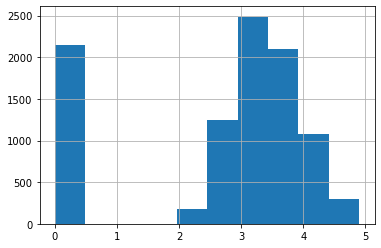

In [61]:
data['Aggregate rating'].hist()

In [62]:
data['Aggregate rating'].min()

0.0

In [63]:
#Grouped_data = data.groupby(['Cuisines','Aggregate rating']),['Countries'].count().sort_values(ascending=False)
# Cuisines in India
#Grouped_data_Country = Grouped_data.groupby['Countries'].count()
Grouped_data = data.groupby(['City','Cuisines']).mean('Aggregate rating')
Grouped_data

Restaurant ID  Country Code  \
City      Cuisines                                                          
Abu Dhabi American                               11958195.0         214.0   
          American, Desserts                      5702574.0         214.0   
          American, Mexican, Seafood              5701052.0         214.0   
          Asian                                  18277098.0         214.0   
          Chinese                                 5701917.0         214.0   
...                                                     ...           ...   
€¡stanbul Restaurant Cafe                         5921545.5         208.0   
          Restaurant Cafe, Desserts               5902117.0         208.0   
          Restaurant Cafe, Turkish, Desserts      5905215.0         208.0   
          Turkish                                 5915730.0         208.0   
          World Cuisine, Patisserie, Cafe         5908749.0         208.0   

                                              Longitude   Latitude  \
City      Cuisines                                                   
Abu Dhabi American                            54.382872  24.495598   
          American, Desserts                  54.606854  24.490531   
          American, Mexican, Seafood          54.413141  24.434099   
          Asian                               54.375008  24.470836   
          Chinese                             54.357829  24.487611   
...                                                 ...        ...   
€¡stanbul Restaurant Cafe                     29.029412  41.023842   
          Restaurant Cafe, Desserts           29.002896  41.044813   
          Restaurant Cafe, Turkish, Desserts  29.056620  41.104969   
          Turkish                             28.977392  41.022793   
          World Cuisine, Patisserie, Cafe     29.041297  41.009847   

                                              Average Cost for two  \
City      Cuisines                                                   
Abu Dhabi American                                           225.0   
          American, Desserts                                 200.0   
          American, Mexican, Seafood                         250.0   
          Asian                                              180.0   
          Chinese                                            250.0   
...                                                            ...   
€¡stanbul Restaurant Cafe                                    100.0   
          Restaurant Cafe, Desserts                           80.0   
          Restaurant Cafe, Turkish, Desserts                  75.0   
          Turkish                                             80.0   
          World Cuisine, Patisserie, Cafe                    105.0   

                                              Price range  Aggregate rating  \
City      Cuisines                                                            
Abu Dhabi American                                    4.0              4.60   
          American, Desserts                          4.0              4.60   
          American, Mexican, Seafood                  4.0              4.00   
          Asian                                       4.0              4.60   
          Chinese                                     4.0              4.20   
...                                                   ...               ...   
€¡stanbul Restaurant Cafe                             3.5              3.85   
          Restaurant Cafe, Desserts                   3.0              4.20   
          Restaurant Cafe, Turkish, Desserts          3.0              4.20   
          Turkish                                     3.0              4.10   
          World Cuisine, Patisserie, Cafe             3.0              4.20   

                                               Votes  
City      Cuisines                                    
Abu Dhabi American                             291.5  
          American, Desserts 

In [64]:
Grouped_data.head(2)

Restaurant ID  Country Code  Longitude  \
City      Cuisines                                                     
Abu Dhabi American               11958195.0         214.0  54.382872   
          American, Desserts      5702574.0         214.0  54.606854   

                               Latitude  Average Cost for two  Price range  \
City      Cuisines                                                           
Abu Dhabi American            24.495598                 225.0          4.0   
          American, Desserts  24.490531                 200.0          4.0   

                              Aggregate rating  Votes  
City      Cuisines                                     
Abu Dhabi American                         4.6  291.5  
          American, Desserts               4.6  586.0

In [65]:
Grouped_data.columns

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [66]:
Grouped_data['Aggregate rating'].sort_values(ascending=False).head(10)

City        Cuisines                    
Inner City  Tapas                           4.9
Pasig City  Filipino, Mexican               4.9
London      Steak                           4.9
Des Moines  American, Coffee and Tea        4.9
Jaipur      Italian, Bakery, Continental    4.9
Doha        Chinese                         4.9
Pretoria    French                          4.9
Inner City  European, Contemporary          4.9
London      British                         4.9
Kolkata     North Indian, Chinese           4.9
Name: Aggregate rating, dtype: float64

In [67]:
# # The top 10 cuisines according to the ratings are North Indian, Chinese, FastFood, 
# The top 10 restaurantsa are Tapas, Filipino,Mexican, Steak, American,Coffee and Tea, Italian, Bakery, Continetal, Chinese, French,
# European, Contemporary, British, North Indian, Chinese are some of the top cuisines across cities..

In [68]:

Grouped_data.loc['London']

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Cuisines,,,,,,,,
"American, Burger",6.112627e+06,215.0,-0.128136,51.512859,33.333333,2.333333,4.133333,395.333333
British,6.114829e+06,215.0,-0.080963,51.516284,55.000000,3.000000,4.900000,706.000000
"British, Contemporary",6.113857e+06,215.0,-0.141557,51.512669,100.000000,4.000000,4.500000,148.000000
"Chinese, Dim Sum",6.103384e+06,215.0,-0.140045,51.512040,105.000000,4.000000,4.750000,860.500000
French,6.113680e+06,215.0,-0.162092,51.485509,230.000000,4.000000,4.700000,320.000000
"Indian, Cafe, Curry",6.103922e+06,215.0,-0.076581,51.524536,55.000000,3.000000,4.500000,305.000000
"Indian, Curry",6.100054e+06,215.0,-0.123132,51.513196,30.000000,2.000000,4.100000,316.000000
"Indian, North Indian, Curry, Cafe",6.103211e+06,215.0,-0.127164,51.512417,35.000000,2.000000,4.700000,964.000000
"Indian, Pakistani, Curry",6.118140e+06,215.0,-0.141645,51.508515,80.000000,4.000000,4.700000,214.000000


In [69]:
data['City'].unique()

array(['Jakarta', 'Tangerang', 'Bogor', 'Bandung', 'New Delhi',
       'Pasay City', 'Gurgaon', 'Colombo', 'Mandaluyong City', 'Agra',
       'Noida', 'Pretoria', 'Taguig City', 'Kanpur', 'Ghaziabad',
       'Jaipur', 'Bangalore', 'Chandigarh', 'Pune', 'Chennai', 'Goa',
       'Hyderabad', 'Indore', 'Lucknow', 'Ludhiana', 'Panchkula',
       'Ranchi', 'Faridabad', 'Kolkata', 'Ahmedabad', 'Aurangabad',
       'Bhopal', 'Mysore', 'Vizag', 'Guwahati', 'Dehradun', 'Mangalore',
       'Nagpur', 'Patna', 'Inner City', 'Bhubaneshwar', 'Coimbatore',
       'Kochi', 'Mumbai', 'Nashik', 'Puducherry', 'Surat', 'Vadodara',
       'Makati City', 'Tagaytay City', 'Amritsar', 'Pasig City',
       'Varanasi', 'San Juan City', 'Allahabad', 'Johannesburg',
       'Santa Rosa', 'Secunderabad', 'Quezon City', 'Cape Town', 'Mohali',
       'Doha', 'Sandton', 'Singapore', 'Abu Dhabi', 'Dubai', 'SÌ£o Paulo',
       'Ankara', 'BrasÌ_lia', 'Rio de Janeiro', 'Sharjah', 'London',
       'Wellington City', 'Randb

In [70]:
# What is the maximum and minimum number of cuisines that a restaurant serves?
# Also, which is the most served cuisine across the restaurant for each city?

data['Restaurant Name'].unique()

array(['Skye', 'Satoo - Hotel Shangri-La', 'Sushi Masa', ...,
       'UrbanCrave', 'Deena Chat Bhandar', 'VNS Live Studio'],
      dtype=object)

In [71]:
data['Restaurant Name'].unique()

array(['Skye', 'Satoo - Hotel Shangri-La', 'Sushi Masa', ...,
       'UrbanCrave', 'Deena Chat Bhandar', 'VNS Live Studio'],
      dtype=object)

In [72]:
len(pandas.unique(data['Restaurant Name']))

7436

In [73]:
data.groupby(['Restaurant Name'])['Cuisines'].count()

Restaurant Name
12212                   1
 Let's Burrrp           1
#45                     1
#Dilliwaala6            1
#InstaFreeze            1
                       ..
t Lounge by Dilmah      1
tashas                  1
wagamama                1
{Niche} - Cafe & Bar    1
Ìàukura€Ùa Sofras€±     1
Name: Cuisines, Length: 7436, dtype: int64

In [74]:
city_count = data.groupby(['Countries','City']).agg(Count = ('Restaurant ID','count'))
city_count

Count
Countries     City                 
Australia     Armidale            1
              Balingup            1
              Beechworth          1
              Dicky Beach         1
              East Ballina        1
...                             ...
United States Valdosta           20
              Vernonia            1
              Waterloo           20
              Weirton             1
              Winchester Bay      1

[140 rows x 1 columns]

In [75]:
city_count.sort_values(by='Count', ascending= False)

Count
Countries     City                 
India         New Delhi        5473
              Gurgaon          1118
              Noida            1080
              Faridabad         251
              Ghaziabad          25
...                             ...
              Panchkula           1
Australia     Balingup            1
Indonesia     Bandung             1
Phillipines   Quezon City         1
United States Winchester Bay      1

[140 rows x 1 columns]

In [76]:
# From the above analysis,we can say that New Delhi has highest count of restaurants (5473) in our data.
# There are many cities that only has one Restaurant.

In [77]:
# The below Restaurants that has minimum( only 1) Restaurant in our data

city_count[city_count['Count']==1]

Count
Countries     City                   
Australia     Armidale              1
              Balingup              1
              Beechworth            1
              Dicky Beach           1
              East Ballina          1
              Flaxton               1
              Forrest               1
              Huskisson             1
              Inverloch             1
              Lakes Entrance        1
              Lorn                  1
              Macedon               1
              Mayfield              1
              Middleton Beach       1
              Montville             1
              Palm Cove             1
              Paynesville           1
              Penola                1
              Phillip Island        1
              Tanunda               1
              Trentham East         1
              Victor Harbor         1
Canada        Chatham-Kent          1
              Consort               1
              Vineland Station      1
              Yorkton               1
India         Mohali                1
              Panchkula             1
Indonesia     Bandung               1
Phillipines   Quezon City           1
              Tagaytay City         1
South Africa  Randburg              1
United States Clatskanie            1
              Cochrane              1
              Fernley               1
              Lakeview              1
              Lincoln               1
              Mc Millan             1
              Monroe                1
              Ojo Caliente          1
              Potrero               1
              Princeton             1
              Vernonia              1
              Weirton               1
              Winchester Bay        1

In [78]:
# Cuisines served in New Delhi Restaurants
Grouped_data.head(2)

Restaurant ID  Country Code  Longitude  \
City      Cuisines                                                     
Abu Dhabi American               11958195.0         214.0  54.382872   
          American, Desserts      5702574.0         214.0  54.606854   

                               Latitude  Average Cost for two  Price range  \
City      Cuisines                                                           
Abu Dhabi American            24.495598                 225.0          4.0   
          American, Desserts  24.490531                 200.0          4.0   

                              Aggregate rating  Votes  
City      Cuisines                                     
Abu Dhabi American                         4.6  291.5  
          American, Desserts               4.6  586.0

In [79]:
Grouped_data.columns

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [80]:
data.loc[data['City']=='New Delhi','Cuisines'].value_counts()

North Indian                                   658
North Indian, Chinese                          284
Fast Food                                      242
Chinese                                        228
North Indian, Mughlai                          207
                                              ... 
Italian, Continental, Fast Food, Chinese         1
Continental, Thai, Chinese, North Indian         1
Continental, Seafood, North Indian               1
Continental, Fast Food, North Indian, Asian      1
Fast Food, Chinese, Mithai, Street Food          1
Name: Cuisines, Length: 892, dtype: int64

In [81]:
# North Indian is the most served cuisine in New Delhi Restaurants
# Some of the cuisines are least served cuisines in New Delhi Restuarants

In [82]:
data.loc[data['City']== 'New Delhi','Cuisines'].sort_values(ascending=False)

1318                                   Vietnamese
306        Turkish, Mediterranean, Middle Eastern
5237         Turkish, Arabian, Moroccan, Lebanese
3125                                      Turkish
2824                                      Turkish
                          ...                    
5327                                     American
4158    Afghani, North Indian, Pakistani, Arabian
3791                    Afghani, Mughlai, Chinese
3388                                      Afghani
6353                                      Afghani
Name: Cuisines, Length: 5473, dtype: object

In [83]:
City_cuisines = data.groupby(['City','Restaurant Name','Cuisines']).agg(Count = ('Restaurant ID','count'))
City_cuisines.sort_values(by='Count',ascending=False)

Count
City      Restaurant Name          Cuisines                                       
New Delhi Cafe Coffee Day          Cafe                                         57
          Domino's Pizza           Pizza, Fast Food                             55
          Subway                   American, Fast Food, Salad, Healthy Food     38
          Green Chick Chop         Raw Meats, North Indian, Fast Food           35
          McDonald's               Fast Food, Burger                            33
...                                                                            ...
          Bhukkad                  North Indian                                  1
          Bhola Dhaba              North Indian                                  1
          Bhoj Restaurant          North Indian, Mughlai                         1
          Bhogalji Bikaner Sweets  Mithai                                        1
€¡stanbul Walter's Coffee Roastery Cafe                                          1

[8281 rows x 1 columns]

In [84]:
data.loc[data['Restaurant Name']=='Cafe Coffee Day','Cuisines'].value_counts()

Cafe    83
Name: Cuisines, dtype: int64

In [85]:
data.loc[data['Restaurant Name']=='Subway','Cuisines'].value_counts()

American, Fast Food, Salad, Healthy Food    62
Fast Food, American, Salad, Healthy Food     1
Name: Cuisines, dtype: int64

In [86]:
# New Delhi city has maximum restaurants as per our data , and Cafe Coffee Day are the most resturants in New Delhi..
# The cuisine it serves is Cafe.
# Many Restaurants serve only one cuisine and Many cities has only one Resturant..

In [87]:
# Relationship between no. of cuisines and Ratings
Cuisines_count = data['Cuisines'].value_counts()
Cuisines_count

North Indian                                        936
North Indian, Chinese                               511
Chinese                                             354
Fast Food                                           354
North Indian, Mughlai                               334
                                                   ... 
Italian, Cafe                                         1
North Indian, Fast Food, Biryani                      1
Burger, American, Fast Food, Italian, Pizza           1
Seafood, Mughlai, North Indian                        1
Cafe, North Indian, Italian, Japanese, Fast Food      1
Name: Cuisines, Length: 1825, dtype: int64

In [88]:
Rating_count = data['Aggregate rating'].value_counts()
Rating_count

0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     399
2.9     381
3.9     332
2.8     315
4.1     273
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     143
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      41
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

In [89]:
# What is the distribution cost across the restaurants?

data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Countries
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia


(array([   1,    2,    3, ..., 1823, 1824, 1825]),
 [Text(1, 0, 'Afghani'),
  Text(2, 0, 'Afghani, Mughlai, Chinese'),
  Text(3, 0, 'Afghani, North Indian'),
  Text(4, 0, 'Afghani, North Indian, Pakistani, Arabian'),
  Text(5, 0, 'African'),
  Text(6, 0, 'African, Portuguese'),
  Text(7, 0, 'American'),
  Text(8, 0, 'American, Asian, Burger'),
  Text(9, 0, 'American, Asian, European, Seafood'),
  Text(10, 0, 'American, Asian, Italian, Seafood'),
  Text(11, 0, 'American, Asian, North Indian, Mexican, South Indian'),
  Text(12, 0, 'American, BBQ'),
  Text(13, 0, 'American, BBQ, Burger'),
  Text(14, 0, 'American, BBQ, Sandwich'),
  Text(15, 0, 'American, BBQ, Seafood'),
  Text(16, 0, 'American, BBQ, Southern'),
  Text(17, 0, 'American, BBQ, Steak'),
  Text(18, 0, 'American, Bakery, European, Burger, Fusion'),
  Text(19, 0, 'American, Bar Food'),
  Text(20, 0, 'American, Bar Food, BBQ'),
  Text(21, 0, 'American, Bar Food, Sandwich'),
  Text(22, 0, 'American, Breakfast'),
  Text(23, 0, 'Ame

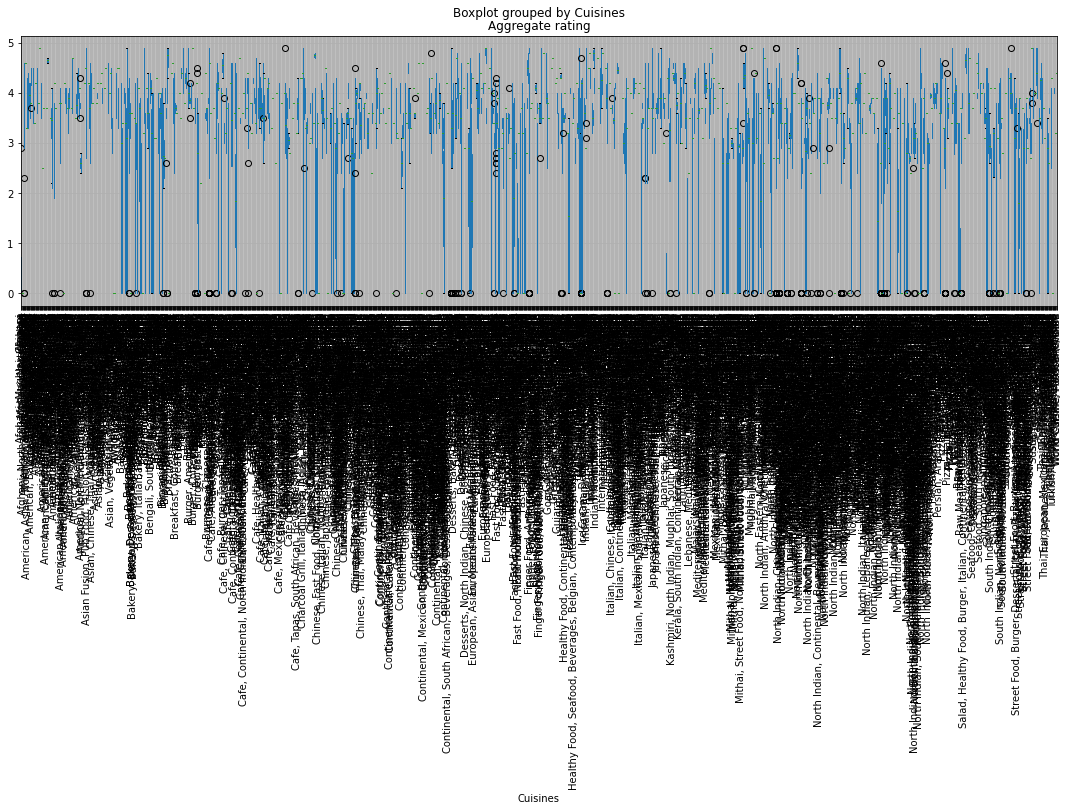

In [90]:
data.boxplot(column='Aggregate rating', by='Cuisines', figsize=(18,5))
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Average cost vs Rating')

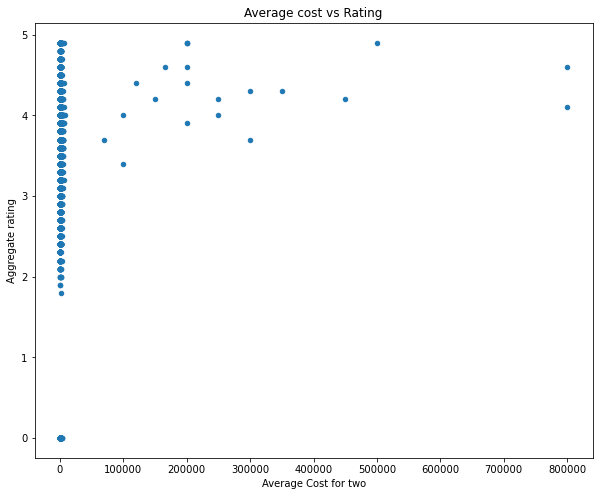

In [91]:
#What is the distribution cost across the restaurants?

# Average cost per two is a continuous variable and Aggregate Rating is a Continuous Variable..
# when the tarhet and predictor variables are continuous we use scatter plot.

data.plot.scatter(x='Average Cost for two',y='Aggregate rating',figsize=(10,8))
plt.title('Average cost vs Rating')


In [92]:
# Average Cost for two is continuous variable
# Restaurants are categorical variable
data['Restaurant Name'].unique()

array(['Skye', 'Satoo - Hotel Shangri-La', 'Sushi Masa', ...,
       'UrbanCrave', 'Deena Chat Bhandar', 'VNS Live Studio'],
      dtype=object)

array([[<AxesSubplot:title={'center':'Average Cost for two'}>]],
      dtype=object)

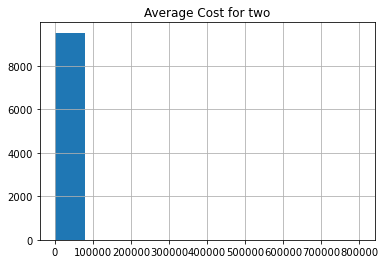

In [93]:
data.hist(column='Average Cost for two')


In [94]:
data['Average Cost for two'].max()

800000

In [95]:
data['Average Cost for two'].min()

0

In [96]:
# The cost is between 0 and 800000 acroos the Restaurants

In [97]:
#How ratings are distributed among the various factors?
# Explain the factors in the data that may have an effect on ratings. For example, number of cuisines, cost, delivery option, etc.


In [98]:

# Ratings is the target variable in our data..
# all the other columns are independent/Predictor variables
# ratings is continuous variable..

# When we are analyzing dta, its important to understand the relationship between target variable and independent variables..

# when two variables are continuous we find the relation between them using scatter plot..
# when one variable is continuous and one variable is categorical, we find the relation using  box plots..
# when both variables are categorical , we find the relation using bar charts..


Text(0.5, 1.0, ' Ratings Vs Latitude')

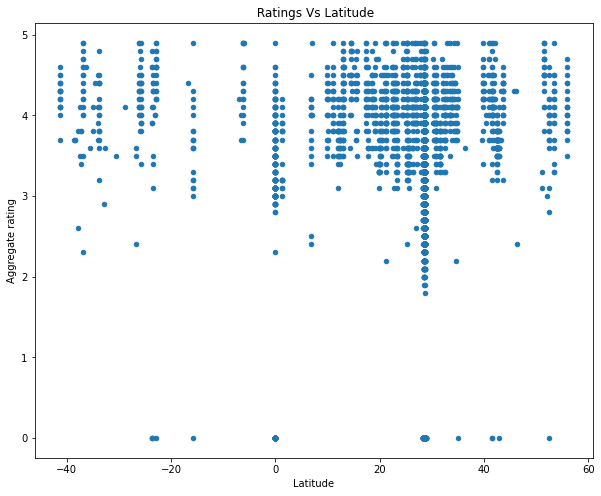

In [99]:
# Latitude vs Ratings
# Latitude is Continuous and Ratings is continuous

data.plot.scatter(x='Latitude',y='Aggregate rating',figsize=(10,8))
plt.title(' Ratings Vs Latitude')

Text(0.5, 1.0, ' Ratings Vs Longitude')

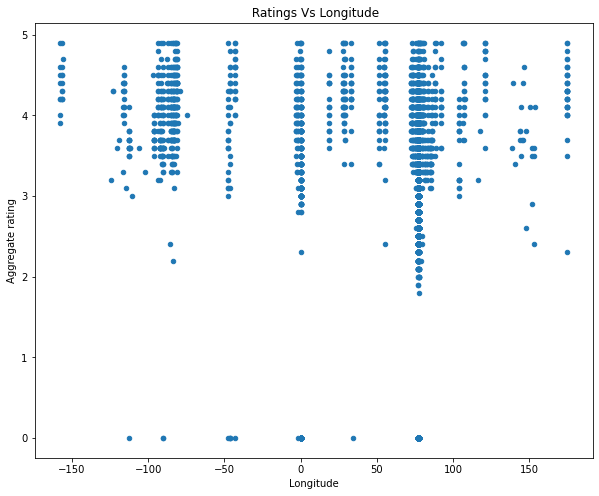

In [100]:
# Longitude vs Ratings
# Longitude is Continuous and Ratings is continuous

data.plot.scatter(x='Longitude',y='Aggregate rating',figsize=(10,8))
plt.title(' Ratings Vs Longitude')

Text(0.5, 1.0, ' Ratings Vs Average Cost for two ')

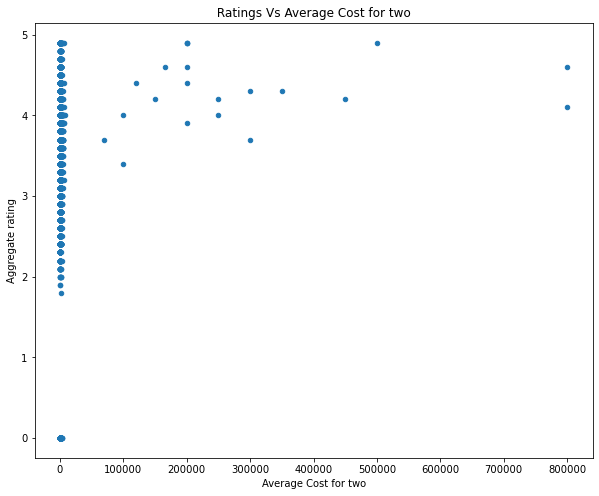

In [101]:
# Average Cost for two is continuous
# ratings Vs Average cost for two


data.plot.scatter(x='Average Cost for two',y='Aggregate rating',figsize=(10,8))
plt.title(' Ratings Vs Average Cost for two ')

Text(0.5, 1.0, ' Ratings Vs Votes')

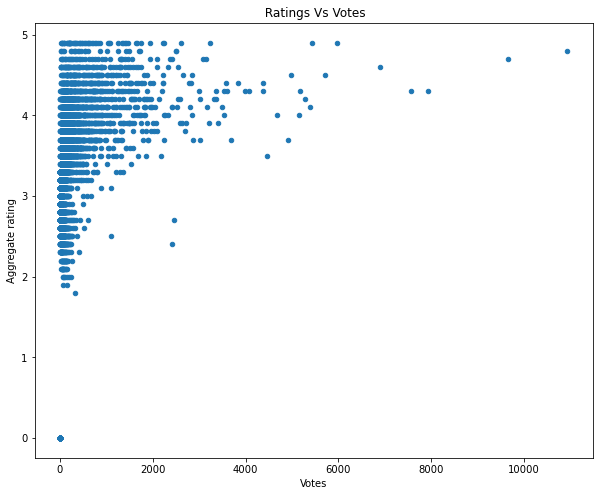

In [102]:
# Votes are Continuous variable
# Votes vs Ratings


data.plot.scatter(x='Votes',y='Aggregate rating',figsize=(10,8))
plt.title(' Ratings Vs Votes')

In [103]:
# To find the Relationshgip between two continuous variables we use pearson correlation coefficient..
# if ther is a positive correlatio between two variables that means if one increses, the other variable increase and coefficient is in between 0,1
# The negative correlation means the coefficient between -1,0
# 0 coeffient means no relation between two variables..

# finding the correlation between continuous variable sin our data

Corr_data =data[['Aggregate rating','Latitude','Longitude','Average Cost for two','Votes']].corr()
Corr_data

,Aggregate rating,Latitude,Longitude,Average Cost for two,Votes
Aggregate rating,1.000000,0.000222,-0.114759,0.051869,0.313381
Latitude,0.000222,1.000000,0.045421,-0.111081,-0.022879
Longitude,-0.114759,0.045421,1.000000,0.045949,-0.084410
Average Cost for two,0.051869,-0.111081,0.045949,1.000000,0.067844
Votes,0.313381,-0.022879,-0.084410,0.067844,1.000000


In [104]:
# As per the above table we can say that Ratings has a positive correlation with  Average Cost for two , Latitude, and Votes 


<AxesSubplot:title={'center':'Aggregate rating'}, xlabel='Has Table booking'>

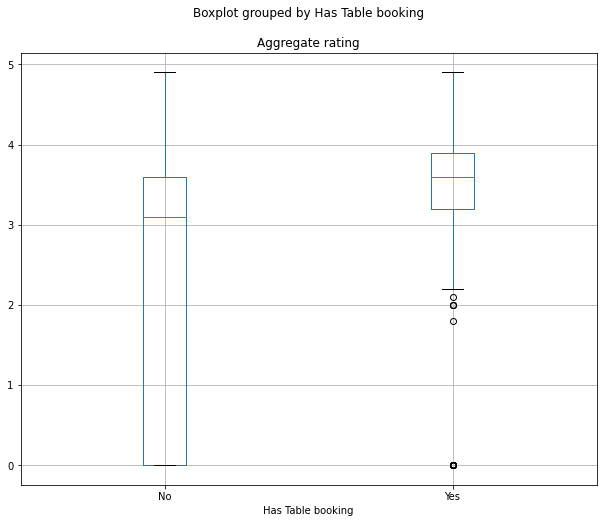

In [105]:
# When one variable is Categorical and one variable is continuous we use boxplots to visualize data..
# ratings Vs HAs Table Booking
data.boxplot(column='Aggregate rating',by='Has Table booking',figsize=(10,8))

<AxesSubplot:title={'center':'Aggregate rating'}, xlabel='Has Online delivery'>

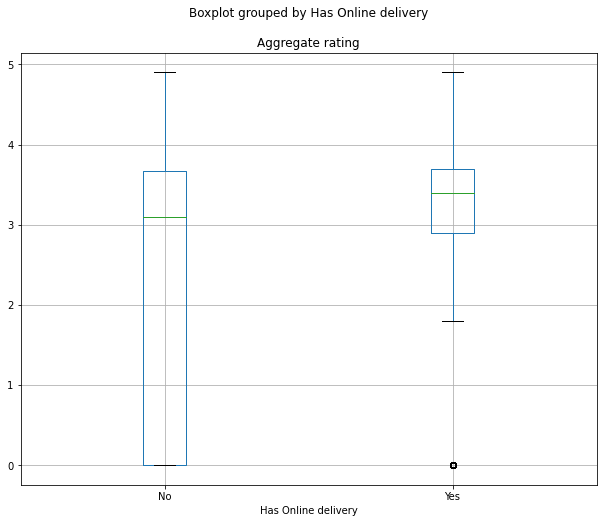

In [106]:
# Ratings Vs Has Online delivery

data.boxplot(column='Aggregate rating',by='Has Online delivery',figsize=(10,8))

Text(0.5, 1.0, 'Rating Vs Price range ')

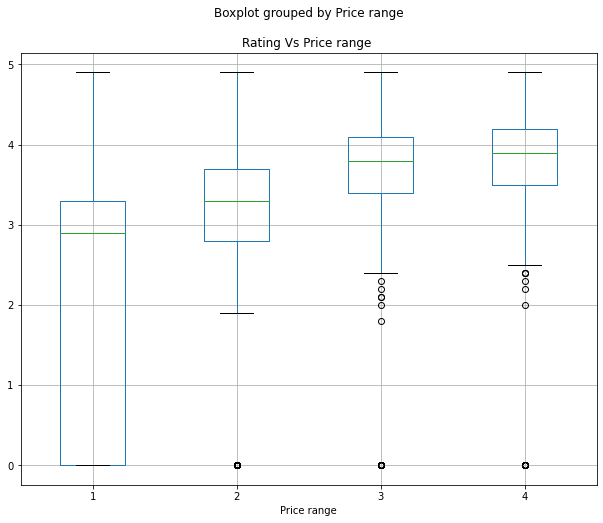

In [107]:
# Ratings Vs Price range

data.boxplot(column='Aggregate rating',by='Price range',figsize=(10,8))
plt.title('Rating Vs Price range ')

In [108]:
# If the distribution looks similar for each category that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

# if the distribution is different for each category, It hints that these variables might be correlated with Rating.

# In our data, all three categorical predictors looks correlated with the Target variable.
# We use ANOVA test to find the correlation between categorical and continuous variables
# In ANOVA test, H0 ( Null Hypothesis )is that there is no relationship between two varibles 
# if p-value is <0.05 , we reject Null Hypothesis..


import scipy.stats as stats
from scipy.stats import f_oneway
T_Yes= data.groupby('Has Table booking')['Aggregate rating'].apply(list)
Anova_Results = f_oneway(*T_Yes)
Anova_Results



F_onewayResult(statistic=358.8090622973279, pvalue=1.4013559755656567e-78)

In [109]:
# if p-value is < 0.05 then we reject H0 ..

if (Anova_Results[1]  < 0.05):
    print('Has Table Booking', 'is correlated with', 'Aggregate Rating', '| P-Value:', Anova_Results[1])            
else:
    print('Has Table Booking', 'is NOT correlated with', 'Aggregate Rating', '| P-Value:', Anova_Results[1])
            


Has Table Booking is correlated with Aggregate Rating | P-Value: 1.4013559755656567e-78


In [110]:
O_Yes= data.groupby('Has Online delivery')['Aggregate rating'].apply(list)
Anova_Results = f_oneway(*O_Yes)
Anova_Results
if (Anova_Results[1]  < 0.05):
    print('Has Online Delivery', 'is correlated with', 'Aggregate Rating', '| P-Value:', Anova_Results[1])            
else:
    print('Has Online Delivery', 'is NOT correlated with', 'Aggregate Rating', '| P-Value:', Anova_Results[1])


Has Online Delivery is correlated with Aggregate Rating | P-Value: 4.3982765040969695e-111


In [111]:
Price_range = data.groupby('Price range')['Aggregate rating'].apply(list)
Anova_Results = f_oneway(*Price_range)
Anova_Results
if (Anova_Results[1]  < 0.05):
    print('Price range', 'is correlated with', 'Aggregate Rating', '| P-Value:', Anova_Results[1])            
else:
    print('Price range', 'is NOT correlated with', 'Aggregate Rating', '| P-Value:', Anova_Results[1])


Price range is correlated with Aggregate Rating | P-Value: 0.0


In [112]:
# The three categorical variables are in correlation with Ratings(Target variable)

In [113]:
cuisines_high_rating  = data.loc[data['Aggregate rating']>=4.5,'Cuisines'].value_counts()
cuisines_high_rating

Cafe                                      8
Italian                                   7
North Indian                              7
Ice Cream                                 5
Indian                                    5
                                         ..
Italian, Pizza, Sandwich                  1
Indian, Street Food                       1
Asian, Sushi, Seafood                     1
Sushi, Teriyaki                           1
Seafood, Continental, European, German    1
Name: Cuisines, Length: 214, dtype: int64

In [114]:
data.boxplot(column='Aggregate rating',by='cuisines_high_rating',figsize=(15,8))
plt.title('Rating Vs Cuisines ')
plt.xticks(rotation=90)
plt.show()

KeyError: 'cuisines_high_rating'

In [ ]:
# ANOVA Test are helpful to find the correlation between continuous and categorical variables..
Cuisines_range = data.groupby('Cuisines')['Aggregate rating'].apply(list)
Anova_Results = f_oneway(*Cuisines_range)
Anova_Results
if (Anova_Results[1]  < 0.05):
    print('Cuisines', 'is correlated with', 'Aggregate Rating', '| P-Value:', Anova_Results[1])            
else:
    print('Cuisines', 'is NOT correlated with', 'Aggregate Rating', '| P-Value:', Anova_Results[1])


In [ ]:
# To further Analyze the data, and to find out the Accuracy of the model, we do Regression analysis 
# for that, we can drop some of the columnns in the data that dont have any significance in our analysis

data.columns

In [ ]:
selected_data = data[['Has Table booking','Has Online delivery','Average Cost for two','Price range','Votes']]
selected_data.head()

In [ ]:
# For the Machine Learning of data, We are going to replace Categorical varaibles with numeric..
# We have two columns that are in Categorical varaibles , so we can convert them into 1 or 0

selected_data['Has Table booking'].replace({'Yes':1,'No':0},inplace=True)
selected_data['Has Online delivery'].replace({'Yes':1,'No':0},inplace=True)
selected_data.head()

In [ ]:
# getting Dummie variables
selected_data = pandas.get_dummies(selected_data)

# Including Target variable in selected_data for Analysis
selected_data['Rating'] = data['Aggregate rating']



# selected_data
selected_data.head()
selected_data.shape

In [ ]:
selected_data = selected_data[selected_data['Rating']>0.0]
selected_data.shape

In [ ]:
selected_data['Rating'].hist()

In [ ]:
selected_data.columns

In [ ]:
# In our selected data Rating is the target variable and all the other variables are predictor variables

Target_variable = 'Rating'
Predictor_variable = ['Has Table booking', 'Has Online delivery', 'Average Cost for two','Price range', 'Votes']

x= selected_data[Predictor_variable].values
y= selected_data[Target_variable].values

x




In [ ]:
y

In [ ]:
# Splitting the selected data into train and test data..

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

# when we are analyzing a data and building a model, Normalization/Standardization of data is important to get a better results 

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

print('x_train shape is', x_train.shape)
print('x_test shape is',x_test.shape)
print('y_train shape is',y_train.shape)
print('y_test shape is',y_test.shape)


In [ ]:
# Multiple Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn import metrics
Model = LinearRegression()
print(Model)

# Applying Model on training Data
linear_regression = Model.fit(x_train,y_train)
prediction = linear_regression.predict(x_test)

# R2  value according to our model..
R2_value = metrics.r2_score(y_train,linear_regression.predict(x_train))
R2_value
 



In [ ]:
# Printing some sample values of prediction

TestingDataResults=pandas.DataFrame(data=x_test, columns=Predictor_variable)

TestingDataResults[Target_variable]=y_test
TestingDataResults[('Predicted'+Target_variable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[Target_variable,'Predicted'+Target_variable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])
TestingDataResults['APE']



In [ ]:
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(Model, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [ ]:
# The Accuracy of the model is 79% according to the Multiple Linear Regression..


In [ ]:
# We can use different types of models and find the accuracy of predicting the final results( target_variable) based on all other variables..
# 
# In genereal , we are going to try different models and come to conclusion about which model is best based on th eaccuracy..

In [ ]:
# One of the model is a Decision Tree Algorithm.. A decision tree model can be used for either continuous or discrete values..
# It can perform both Regression and classification techniques..
# The decision tree algorithm uses attributes as nodes.
# the most important node is Root node.
# Decision Trees 
from sklearn.tree import DecisionTreeRegressor
Model = DecisionTreeRegressor(max_depth=6,criterion='mse')
print(Model)


In [ ]:
# Creating the model
# we create the model on Training data

Data_Training=Model.fit(x_train,y_train)
prediction=Data_Training.predict(x_test)

from sklearn import metrics
# Measuring R2 Value
print('R2 Value:',metrics.r2_score(y_train, Data_Training.predict(x_train)))


In [ ]:
feature_importances = pandas.Series(Data_Training.feature_importances_, index=Predictor_variable)
feature_importances.nlargest(10).plot(kind='barh')

In [ ]:
TestingDataResults=pandas.DataFrame(data=x_test, columns=Predictor_variable)

TestingDataResults[Target_variable]=y_test
TestingDataResults[('Predicted'+Target_variable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[Target_variable,'Predicted'+Target_variable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])
TestingDataResults['APE']

In [ ]:
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(Model, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [ ]:
# the accuracy is 90, so We can say that Decision tree model fits better for our data..